# <strong> Using age, blood pressure, cholestrol level, and heart rate to classify heart disease patients in Cleveland. </strong>


### Group 04 - Arshia Singla, Naufal Prasojo, Henry Shi, William Chen


Heart disease, also known as cardiovascular disease, is a broad term encompassing a variety of conditions affecting the heart (such as heart failure and pulmonary heart disease) and blood vessels (such as coronary artery disease and aortic aneurysm). 

It remains a leading cause of morbidity and mortality worldwide, accounting for a significant proportion of deaths each year. Understanding heart disease and its risk factors is essential due to its widespread prevalence and profound impact on public health. 

By exploring and analyzing the dataset, we can identify patterns, trends, and correlations, which can inform evidence-based practices, and policies aimed at reducing the global issue of heart disease and improving patient outcomes. Furthermore, investigating the heart disease datasets can facilitate the development of predictive models, risk assessment tools, and personalized healthcare approaches. Overall, this exploration is crucial for enhancing our understanding of this complex condition and implementing effective strategies to prevent, diagnose, and manage it. 

The goal of this project is to use the risk factors of heart disease to classify patients based on the possibility to have a heart disease.

The question that we will be trying to answer is: <strong> Is a new patient likely to have a heart disease based on their age, blood pressure, cholesterol level, and maximum heart rate? </strong>

## Dataset Description

We will be using the Heart Disease dataset from the Cleveland database. It is a multivariate dataset. 
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
   
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

### Methods

We are using data from the file processed.cleveland.data from the heart disease database to predict the likeliness of a patient from Cleveland having heart disease. The columns that we are using are as follows:

1.  <strong> age: </strong> age in years
2.  <strong> sex: </strong> sex (1 = male; 0 = female)
3.  <strong> cp: </strong> chest pain type
    - Value 1: typical angina;
    - Value 2: atypical angina;
    - Value 3: non-anginal pain;
    - Value 4: asymptomatic)
4.  <strong> trestbps: </strong> resting blood pressure (in mm Hg on admission to the hospital)
5.  <strong> chol: </strong> serum cholestrol in mg/dl
6.  <strong> fbs: </strong> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7.  <strong> restecg: </strong> resting electrocardiographic results 
    - Value 0: normal;
    - Value 1: having ST-T wave abnormality;
    - Value 2: showing probable or definite                                                                                    left ventricular hypertrophy                                                                                    by Estes' criteria
8.  <strong> thalach: </strong> maximum heart rate achieved
9.  <strong> exang: </strong> exercise induced angina (1 = yes; 0 = no)
10. <strong> oldpeak: </strong> ST depression induced by exercise relative to rest 
11. <strong> slope: </strong> the slope of the peak exercise ST segment
    - Value 1: upsloping;
    - Value 2: flat;
    - Value 3: downsloping
12. <strong> ca: </strong> number of major vessels (0 - 3) colored by fluoroscopy
13. <strong> thal: </strong> 3 = normal; 6 = fixed defect; 7 = reversible defect
14. <strong> num: </strong> diagnosis of heart disease (1,2,3,4 = presence, 0 = no presence)


Each column in the dataset has numeric values and it has 303 rows. The missing data is represented with the string "?".

To clean (or tidy) the data, we changed all the "?" values to NA. Since, the <strong> num </strong> column uses integers to indicate the presence (1,2,3,4) or absence (0) of the heart disease in a patient, and we want to determine whether or not a patient has heart disease, we added a new boolean column <strong> diagno </strong> to represent the diagnosis as TRUE or FALSE. 

We then used the initial_split() function to split our tidied dataframe into 75% training data and 25% testing data while stratifying for <strong> diagno</strong>. However, for analysis, we only used the training set. 

We chose 4 predictor variables based on the risk factors of heart disease which are:

- There are many risk factors for heart diseases, with <strong> age </strong>being the most important one (Francis DP et al., 2013).

- High levels of LDL ("bad") <strong>cholestrol</strong> can accumulate in the walls of arteries, forming plaque which narrows the arteries and restricts blood flow to the heart muscle. This increases the risk of heart attack, and coronary artery disease. 

- Abnormalities in <strong>heart rate</strong> can indicate underlying cardiovascular issues and risks for individuals with heart disease. 

- <strong>High blood pressure</strong> (or hypertension), increases the risk of heart disease by damaging arteries, leading to stroke, aneurysms, etc. 


### Step by Step

1. Read and tidy the data
2. Finding K value
3. Visualizing
4. Test

ing


### Preprocessing and exploratory data analysis

#### Importing libraries and formatting graphs

In [1]:
# importing libraries
 
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

### (we need description) Tidy the data

In [28]:
set.seed(1)

# reading the data, assigning column names and character types
cleveland_data <- read_csv("processed.cleveland.csv",
                           col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", 
                                        "exang", "oldpeak", "slope", "ca", "thal", "num"),
                           col_types = list("d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "f" , "f", "d"))

# cleaning (tidying) and wrangling data
cleveland_data[ cleveland_data == "?" ] <- NA

cleveland_tidy <- cleveland_data |>
                   mutate(diagno = ifelse(is.na(num), NA, (num > 0))) |>
                   mutate(sex = as_factor(sex), cp = as_factor(cp),
                         fbs = as_factor(fbs), restecg = as_factor(restecg),
                         exang = as_factor(exang), thal = as_factor(thal), 
                         ca = as_factor(ca), slope = as_factor(slope)) |>
                    mutate(diagno = as_factor(diagno))
head(cleveland_tidy)


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagno
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,FALSE


### (we need description) Split data

In [29]:
# splitting the dataframe into testing and training datasets
cleveland_split <- initial_split(cleveland_tidy, prop = 0.75, strata = num)

cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

head(cleveland_training)

nrow(cleveland_training)
nrow(cleveland_testing)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagno
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,FALSE
56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0,FALSE
57,1,3,150,168,0,0,174,0,1.6,1,0.0,3.0,0,FALSE
49,1,2,130,266,0,0,171,0,0.6,1,0.0,3.0,0,FALSE
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,0,FALSE


[1] 226

[1] 77

### (we need description) Summarizing

In [30]:
# summarizing to get minimum, maximum, and mean of each predictor variable + total number of rows per class
cleveland_summary <- cleveland_training |>
                     group_by(diagno) |> 
                     summarize(min_age = min(age), max_age = max(age), mean_age = mean(age), 
                               min_chol = min(chol), max_chol = max(chol), mean_chol = mean(chol),
                               min_trestbps = min(trestbps), max_trestbps = max(trestbps), mean_trestbps = mean(trestbps),
                               min_thalach = min(thalach), max_thalach = max(thalach), mean_thalach = mean(thalach),
                               no_of_patients = n())

cleveland_summary

diagno,min_age,max_age,mean_age,min_chol,max_chol,mean_chol,min_trestbps,max_trestbps,mean_trestbps,min_thalach,max_thalach,mean_thalach,no_of_patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,29,76,52.68548,126,564,244.2903,94,180,129.7339,105,202,158.9194,124
TRUE,35,77,56.48039,131,409,249.3627,100,192,133.9020,71,195,138.4118,102


### Finding the best K value

#### Creating Model

In [33]:

# Performing Standardization 
cleveland_recipe <- recipe(diagno ~ chol + age + thalach + trestbps, data = cleveland_training) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

# K-nearest neighbour model specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# Perform 10 fold-cross valdiation
cleveland_vfold <- vfold_cv(cleveland_training, v = 10, strata = diagno)

gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

# Create workflow
knn_results <- workflow() |>
      add_recipe(cleveland_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = cleveland_vfold, grid = gridvals) |>
      collect_metrics() |>
      filter(.metric == "accuracy") |>
      select(neighbors, mean) |>
      arrange(desc(mean))

head(knn_results)

neighbors,mean
<dbl>,<dbl>
27,0.6819335
28,0.6819335
47,0.6819335
48,0.6819335
43,0.6781621
44,0.6781621


### Graph the best K value

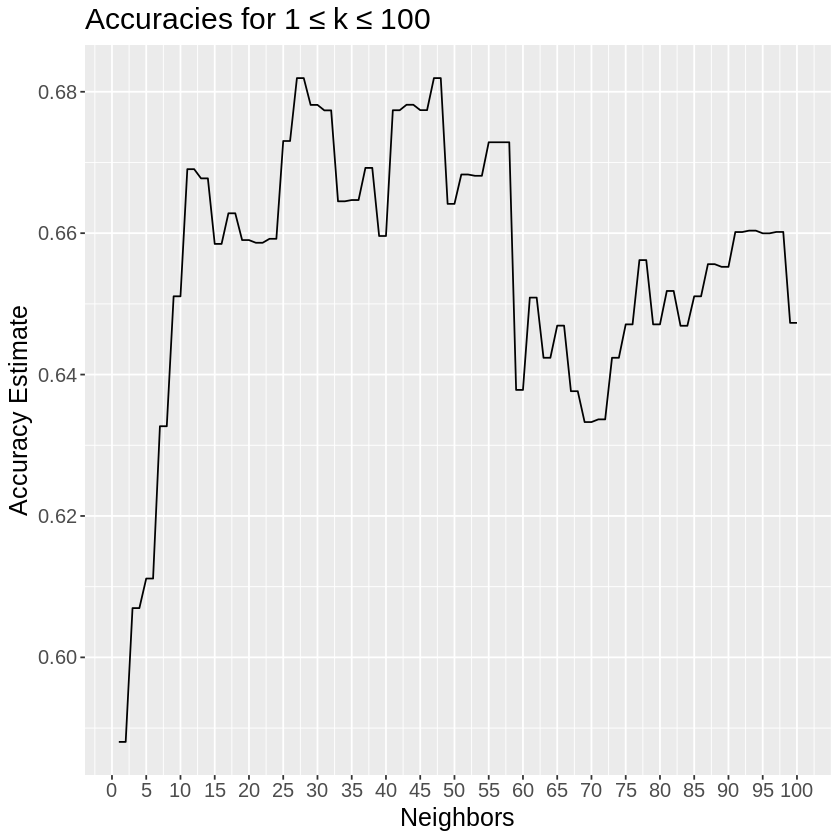

In [34]:
accuracy_versus_k <- ggplot(knn_results, aes(x = neighbors, y = mean))+
      #geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracies for 1 ≤ k ≤ 100") +
      scale_x_continuous(breaks = seq(0, 100, by = 5)) + # adjusting the x-axis
      theme(text = element_text(size = 15))

accuracy_versus_k